In [1]:
import numpy as np
import math as mt
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def convolution(image, kernel):
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            pixel_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    pixel_sum += padded_image[i + m][j + n] * kernel[m][ n]
            result[i][j] = pixel_sum

    return result

In [3]:
kernel = np.array([ [0,1,0], [1,-4,1], [0,1,0] ], dtype=int)

In [4]:
kernel


array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

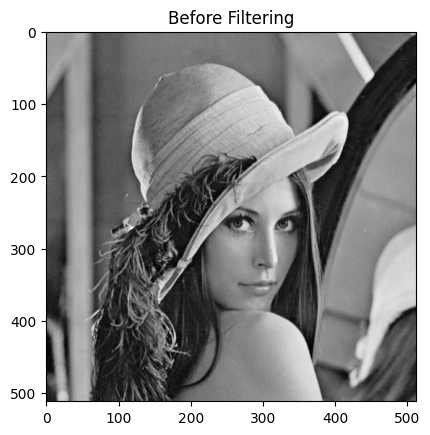

In [5]:
im = cv.imread('CoverImages/lena.tiff',0)
plt.imshow(im, cmap='gray')
plt.title("Before Filtering")
plt.show()

In [6]:
img1 = convolution(im,kernel)

In [7]:
mi = np.min(img1)

In [8]:
for i in range(512):
    for j in range(512):
        img1[i][j] = img1[i][j] - mi

In [9]:
newImg = np.zeros((512,512), dtype=int)
for i in range(512):
    for j in range(512):
       newImg[i][j] = mt.ceil( (im[i][j]+img1[i][j])*255/np.max(img1) ) 

C:\Users\USER\AppData\Local\Temp\ipykernel_18072\1528766119.py:4: RuntimeWarning: overflow encountered in scalar add
  newImg[i][j] = mt.ceil( (im[i][j]+img1[i][j])*255/np.max(img1) )


In [10]:
newImg

array([[ 94,   0, 255, ..., 242, 244, 155],
       [  0, 162, 161, ..., 156, 143,  27],
       [  0, 162, 161, ..., 156, 143,  27],
       ...,
       [  4,  54,  45, ...,  94, 105,  10],
       [255,  54,  35, ..., 101, 102, 243],
       [212,  11, 241, ..., 253,   2, 145]])

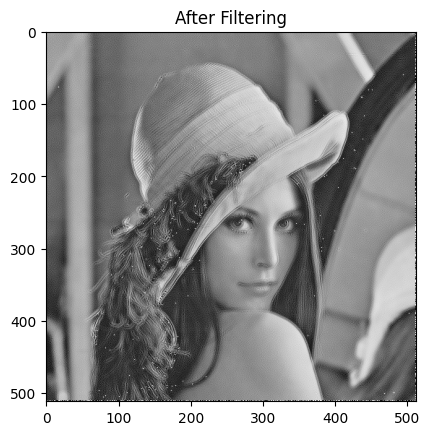

In [11]:
plt.imshow(newImg, cmap='gray')
plt.title("After Filtering")
plt.show()